# Model with steps 10,11,12 and mean_ridge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df1 = pd.read_csv(r'C:\Users\ssenthilkuma\OneDrive - Micron Technology, Inc\BPSG/Dataset/A_10_11_12.csv')

In [3]:
df1.shape

(325, 635)

In [4]:
df =df1.loc[:,~df1.columns.str.contains('_stddev_')]
df.shape

(325, 528)

In [5]:
df=df.loc[:,~df.columns.str.contains('_max_')]
df.shape

(325, 407)

In [6]:
df=df.loc[:,~df.columns.str.contains('_min_')]
df.shape

(325, 303)

In [7]:
df=df.loc[:,~df.columns.str.contains('_resrange_')]
df.shape

(325, 250)

In [8]:
df=df.loc[:,~df.columns.str.contains('_full')]
df.shape

(325, 160)

In [9]:
df=df.loc[:,~df.columns.str.contains('_t_')]
df.shape

(325, 82)

In [10]:
df=df.loc[:,~df.columns.str.contains('EndpointData')]
df.shape

(325, 80)

In [11]:
df=df.loc[:,~df.columns.str.contains('Setpoint')]
df.shape

(325, 62)

In [12]:
# remove the tool_id column as we already have toolname
df=df.drop(['tool_id'],axis=1)
df.shape

(325, 61)

In [ ]:
for col in df.columns:
    print(col)

---

# Chamber A with 2k recipe

In [35]:
#recipe-wise split for 2k recipes
dfA_2k=df[df['recipe_name'].str.contains("10159_A")]
dfA_2k.shape

(152, 61)

In [36]:
# remove columns which contains nan correlation values
dfA_2k=dfA_2k.loc[:,~dfA_2k.columns.str.contains('CleanOn')]
dfA_2k=dfA_2k.loc[:,~dfA_2k.columns.str.contains('ForelineBasePressure')]
dfA_2k.shape

(152, 55)

In [15]:
c = dfA_2k.corr().abs()

s = c.unstack()
so = s['metro'].sort_values(kind="quicksort",ascending=False)
so

metro                                       1.000000
HeaterOutputPowerPercent_mean_10            0.379315
TEBFlow_mean_10                             0.373031
HeaterOutputPowerPercent_mean_12            0.358478
NF3GasFlow_mean_10                          0.308900
NF3GasFlow_mean_12                          0.307004
TEPOFlow_mean_10                            0.236779
N2GasFlow_mean_12                           0.227394
TEOSFlow_mean_10                            0.202537
N2TEOSGasFlow_mean_12                       0.193240
HeatExchangerTemp3_mean_12                  0.190403
TEOSFlow_mean_12                            0.181187
StepElapsedTime_mean_10                     0.180235
O3GasFlow_mean_10                           0.168110
ShowerheadHeaterSpacingOtherSide_mean_10    0.149329
ShowerheadHeaterSpacingOtherSide_mean_12    0.149329
ShowerheadHeaterSpacing_mean_12             0.125021
ShowerheadHeaterSpacing_mean_10             0.125021
HeTEPOGasFlow_mean_12                       0.

In [ ]:
df_new = dfA_2k[['HeaterLiftPosition_mean_10', 'HeaterLiftPosition_mean_12']]
df_new

In [37]:
#dfA_2k=dfA_2k.drop('ShowerheadHeaterSpacingOtherSide_mean_10',axis=1)
dfA_2k=dfA_2k.drop('ShowerheadHeaterSpacingOtherSide_mean_12',axis=1)
dfA_2k.shape

(152, 54)

In [38]:
#dfA_2k=dfA_2k.drop('ShowerheadHeaterSpacing_mean_10',axis=1)
dfA_2k=dfA_2k.drop('ShowerheadHeaterSpacing_mean_12',axis=1)
dfA_2k.shape

(152, 53)

In [39]:
#dfA_2k=dfA_2k.drop('PinLiftPosition_mean_10',axis=1)
dfA_2k=dfA_2k.drop('PinLiftPosition_mean_12',axis=1)
dfA_2k.shape

(152, 52)

In [40]:
# HeaterLiftPosition_mean_10             0.037594
# HeaterLiftPosition_mean_12             0.037594
#dfA_2k=dfA_2k.drop('HeaterLiftPosition_mean_10',axis=1)
dfA_2k=dfA_2k.drop('HeaterLiftPosition_mean_12',axis=1)
dfA_2k.shape

(152, 51)

In [41]:
dfA_2k=dfA_2k.drop('HeTEPOGasFlow_mean_10',axis=1)
dfA_2k=dfA_2k.drop('HeatExchangerTemp1_mean_10',axis=1)
dfA_2k=dfA_2k.drop('O2GasFlow_mean_10',axis=1)
dfA_2k=dfA_2k.drop('HeaterTemp_mean_12',axis=1)
dfA_2k.shape
# HeTEPOGasFlow_mean_10                  0.008203
# HeatExchangerTemp1_mean_10             0.007869
# O2GasFlow_mean_10                      0.003838
# HeaterTemp_mean_12                     0.002273

(152, 47)

In [42]:
dfA_2k=dfA_2k.drop('recipe_name',axis=1)

In [43]:
dfA_2k=dfA_2k.drop('germ_process',axis=1)

In [45]:
dfA_2k.shape

(152, 45)

In [ ]:
# uncomment only if needed 
#dfA_2k=dfA_2k.drop('tool_name',axis=1)

In [47]:
#### saving the dataframe
dfA_2k.to_csv('./dfA_2k_45.csv', index=False)

In [ ]:
dfA_2k=dfA_2k.loc[:,~dfA_2k.columns.str.contains('_12$')]
dfA_2k.shape

In [23]:
#one hot encoding for tool name.
dfA_2k=pd.get_dummies(dfA_2k)

In [24]:
dfA_2k.shape

(152, 46)

In [25]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

In [26]:
#Normalization
object.fit(dfA_2k)
scaled_data = object.transform(dfA_2k)
# store the results in a data frame
dfA_2k_scaled = pd.DataFrame(scaled_data, columns=dfA_2k.columns)

In [27]:
x1 = dfA_2k_scaled['metro']
#x2=[]
# x2 = df_scaled['CarrierGasLinePressureTEOS2_mean_10']
# x3 = df_scaled['CarrierGasLinePressureTEOS2_mean_12']
#y2 = df_scaled['tool_name']

In [ ]:
#df1 = pd.DataFrame(dfA_2k)

c = dfA_2k.corr().abs()

s = c.unstack()
so = s['metro'].sort_values(kind="quicksort",ascending=False)

In [ ]:
so

In [ ]:
dfA_2k.shape

In [28]:
target_column = ['metro'] 
predictors = list(set(list(dfA_2k.columns))-set(target_column))
#dfA_2k[predictors] = dfA_2k[predictors]/dfA_2k[predictors].max()
dfA_2k.describe()

,metro,CarrierGasLinePressureTEOS2_mean_10,CarrierGasLinePressureTEOS2_mean_12,CarrierGasLinePressureTEOS_mean_10,CarrierGasLinePressureTEOS_mean_12,ChamberPressure_mean_10,ChamberPressure_mean_12,HeTEPOGasFlow_mean_12,HeatExchangerResistivity_mean_10,HeatExchangerResistivity_mean_12,...,StepElapsedTime_mean_10,StepElapsedTime_mean_12,TEBFlow_mean_10,TEOSFlow_mean_10,TEOSFlow_mean_12,TEPOFlow_mean_10,ThrottleValveAngle_mean_10,ThrottleValveAngle_mean_12,tool_name_BPPR4D01A1,tool_name_BPPR4D01A2
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,2030.817985,8.138809,8.163064,8.677446,8.720621,100.260439,99.956155,6999.888816,3.337799e+06,3.338539e+06,...,15.010362,1.800258,0.260537,2.295068,2.299695,0.225557,16.804592,16.776946,0.493421,0.506579
std,57.397208,2.263173,2.318764,2.131163,2.185926,0.039722,0.018603,0.301332,4.561369e+04,4.626438e+04,...,0.678583,0.306321,0.011144,0.002906,0.012211,0.014865,0.106125,0.112449,0.501609,0.501609
min,1861.824800,5.919136,5.894101,6.590004,6.596228,100.162824,99.902956,6999.200000,3.301587e+06,3.301587e+06,...,13.476750,1.217000,0.241248,2.285668,2.263800,0.202468,16.479560,16.421800,0.000000,0.000000
25%,1996.865800,5.981607,5.967360,6.645914,6.647727,100.248091,99.945637,6999.800000,3.301587e+06,3.301587e+06,...,14.626556,1.532188,0.250728,2.292677,2.293700,0.211757,16.775591,16.750370,0.000000,0.000000
50%,2034.090200,7.686155,7.719052,8.316591,8.308027,100.267735,99.959005,6999.900000,3.301587e+06,3.301587e+06,...,15.125871,1.778750,0.263971,2.295060,2.299250,0.225542,16.812323,16.787278,0.000000,1.000000
75%,2071.295900,10.409179,10.511605,10.818569,10.919246,100.280774,99.968408,7000.100000,3.399267e+06,3.399267e+06,...,15.404657,2.090500,0.268706,2.297191,2.304375,0.231394,16.854617,16.826848,1.000000,1.000000
max,2162.032800,12.319729,12.562863,12.657578,12.897969,100.356572,99.984814,7000.500000,3.399267e+06,3.399267e+06,...,16.399667,2.348250,0.276323,2.300934,2.341225,0.252053,17.302965,17.284425,1.000000,1.000000


In [29]:
X = dfA_2k[predictors].values
y = dfA_2k[target_column].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
print(X_train.shape); print(X_test.shape)

(121, 45)
(31, 45)


In [31]:
# standardization 
# X_train = object.fit_transform(X_train) 
# X_test=object.transform(X_test)

In [32]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print('MSE_train:',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('R2_train:',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('MSE_test',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2_test:',r2_score(y_test, pred_test_rr))

MSE_train: 35.58582728191368
R2_train: 0.615018010285619
MSE_test 65.48610566075591
R2_test: -0.7386777013887542


pred_test_rr=pred_test_rr-50
#pred_test_rr
print('MSE_train:',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('R2_train:',r2_score(y_train, pred_train_rr))
print('MSE_test',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2_test:',r2_score(y_test, pred_test_rr))

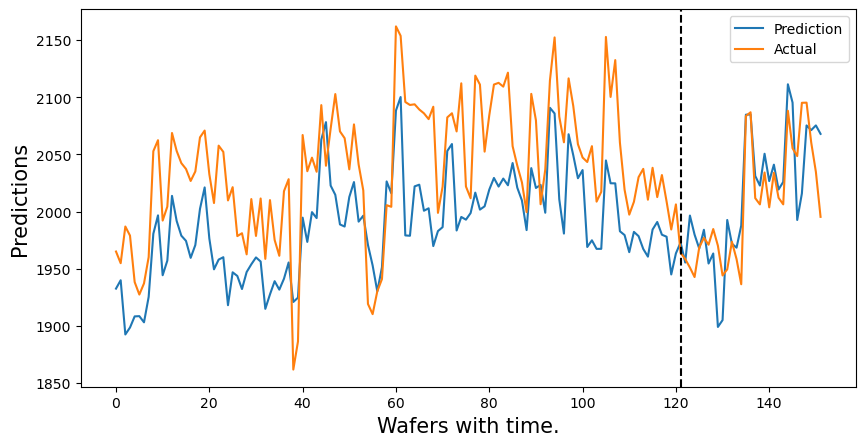

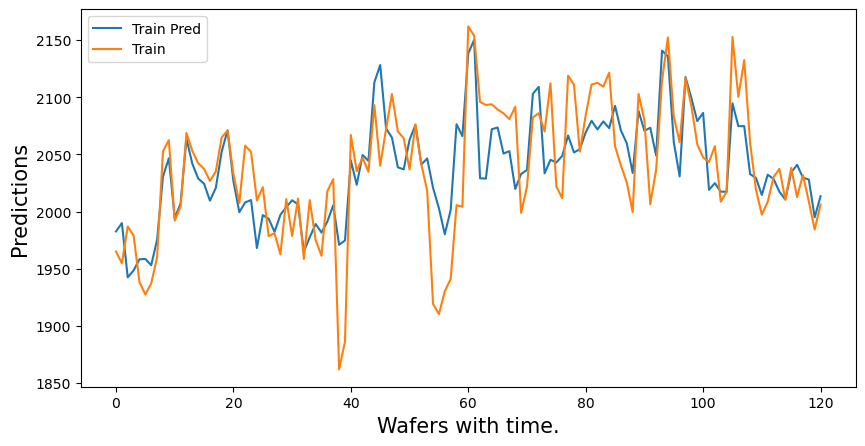

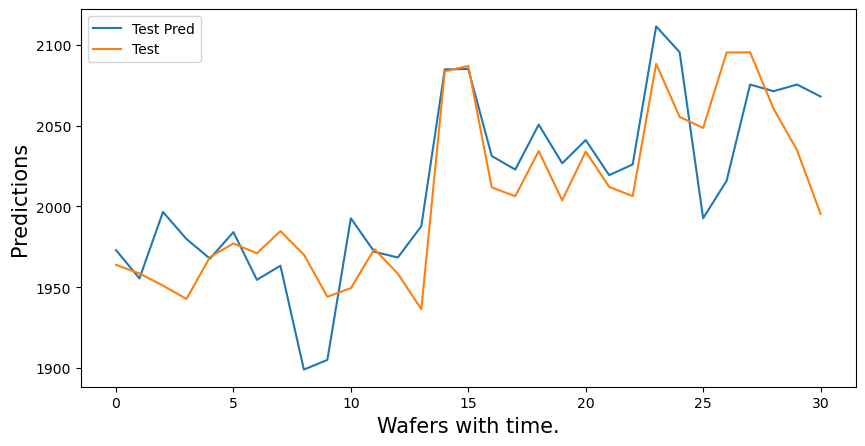

In [34]:
y_pred=rr.predict(X)
y_pred=y_pred-50
# y_train_pred=y_pred

plt.figure(figsize=(10,5), dpi=100)
plt.plot(y_pred,label='Prediction')
# plt.plot(pred_test_rr,label='test Prediction')
plt.plot(y,label='Actual')
plt.axvline(x=len(y_train),linestyle='--',c='black')
plt.legend(fontsize=10)
plt.xlabel("Wafers with time.",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(10,5), dpi=100)
plt.plot(pred_train_rr,label='Train Pred')
plt.plot(y_train,label='Train')
plt.legend(fontsize=10)
plt.xlabel("Wafers with time.",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


plt.figure(figsize=(10,5), dpi=100)
plt.plot(pred_test_rr,label='Test Pred')
plt.plot(y_test,label='Test')
plt.legend(fontsize=10)
plt.xlabel("Wafers with time.",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(10,5), dpi=100)
plt.plot(y_test,label='Test')
plt.plot(pred_test_rr,label='Test Pred Ridge regression')
plt.legend(fontsize=6)
plt.xlabel("Wafers with time.",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
## Train scatter plot
sns.regplot(x=y_train,y=pred_train_rr)

In [ ]:
## Test scatter plot
sns.regplot(x=y_test,y=pred_test_rr)

# Combinatorial_functions

In [ ]:
top_comb_sets,error_scores,stddev_error_scores = combinatorial(data=dfA_2k,model=model,
model_params=model_params_dict,fixed_params=fixed_params,param_list=param_list,max_models=500,val_percentage=0.3,test_percentage=0.3,min_param_combination=1,
max_param_combination=4)

In [ ]:
def combinatorial(data,model,model_params,fixed_params,param_list,max_models=500,val_percentage=0.3,
                  test_percentage=0.3,min_param_combination=1,
                  max_param_combination=4):
    """
    Validates the top parameter sets on the validation set and finds train and test error scores for them.
    
    Input Variables:
    ------
    dataframe                   - Dataframe considered 
    parameter_combination_list  - The top parameter combinations list arranged in correspondance to the scores list
    scores_list                 - The scores corrsponding to the ordered parameter combination list
    metrology_column            - The column of dataframe to be considered for correlation
    
    Output Variable:
    ------
    Prints model performance for each parameter set starting from best model order 
    
    Returns dataframe with new feature list
    """    
    
    global dataframe
    dataframe=data # To be used inside function param_to_error
    #Settings
    pd.set_option('display.max_colwidth', -1)
    plt.rcdefaults()
    rcParams['figure.figsize'] = 6,4

    # Memory initializations
    error_scores=[]
    stddev_error_scores=[]
    top_comb_sets=[]

    #Function calls
    max_iterations=max_iterations_calc(min_param_combination,max_param_combination,len(param_list))

    iteration_count=0
    print("Number of parameters:",len(param_list))
    print("Number of combinations being tried:",max_iterations,"\n"
          "consisting of", np.arange(min_param_combination,max_param_combination+1), " elements")

    #__________________________________________________________________________________________________________
    #__________________________________________________________________________________________________________

    # Algorithm Starts

    for i in np.arange(min_param_combination,max_param_combination+1): # Start from 1 to 15 param combinations
        subset_list=rSubset(param_list, i) # generate nCr combination sets with i elements in it.
        if(iteration_count > 1):
            print("\nBest Subset till ",i-1,"element combination is: ",np.argmax(error_scores),":",\
                  top_comb_sets[np.argmax(error_scores)])
            print("Best R square:",np.max(error_scores).round(5))
        print("\nNext Subset consists of :",i," element combination")
        for subset in subset_list:
            iteration_count=iteration_count+1
            subset=list(subset)
            subset=subset+fixed_params
            rmspe_,stddev_=param_to_error(model,model_params,subset,test_percentage,val_percentage)

            if(len(error_scores))<max_models:
                #add new pamam combination
                top_comb_sets.append(subset)
                error_scores.append(np.round(rmspe_,5))
                stddev_error_scores.append(stddev_)

            elif (rmspe_ > np.min(error_scores)):

                #Remove maximum score param combination
                top_comb_sets.pop(np.argmin(error_scores))
                stddev_error_scores.pop(np.argmin(error_scores))
                pop_=np.argmin(error_scores)
                error_scores.pop(pop_)

                #add new pamam combination
                top_comb_sets.append(subset)
                error_scores.append(np.round(rmspe_,5))
                stddev_error_scores.append(stddev_)

            if(iteration_count % 5000==0):
                    print("Completed : ",int(((iteration_count/max_iterations)*100)),"%")
                    print("Best R square:",np.max(error_scores).round(5))
                    print("Best comb:",top_comb_sets[np.argmax(error_scores)],"\n")


    print("Done")
    print("Completed : ",int(((iteration_count/max_iterations)*100)),"%")
    print("Best % Deviation:",np.max(error_scores).round(5),":",top_comb_sets[np.argmax(error_scores)],"\n")

    return top_comb_sets,error_scores,stddev_error_scores